In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import json

with open('food/train.json') as data_file:    
    data = json.load(data_file)
    
with open('food/test.json') as data_file:    
    test_data = json.load(data_file)



In [2]:
def json_to_list(json, key):
    a_list = []
    for data in json:
        if type(data[key]) == list:
            a_list = a_list + data[key]
        else:
            a_list.append(data[key])
    return a_list

def find_num_uniques(a_list):
    return len(set(a_list))

def get_uniques(a_list):
    return list(set(a_list))

    

In [3]:
ids = json_to_list(data, "id")
cuisines = json_to_list(data, "cuisine")

In [4]:
all_ingredients = json_to_list(data, "ingredients")

In [5]:
num_cuisines = find_num_uniques(cuisines)
num_ingredients = find_num_uniques(all_ingredients)

### Question 2-b - Exploring the data
There are 39,774 sample dishes, 20 different cuisines and 6714 unique ingredients in the dataset.

In [6]:
num_cuisines

20

In [7]:
num_ingredients

6714

In [8]:
len(data)

39774

### Question 2-c - Generating the feature vectors

In [9]:
def get_mapper(a_list):
    """
        Inputs:
        Takes in a list (typically of strings)
        
        Outputs:
        A dictionary used to access the indexes
    """
    mapper ={}
    
    for i in xrange(0, len(a_list)):
        mapper[a_list[i]] = i
    
    return mapper

def get_feature_vector(actual_features, possible_features):
    """
        Inputs:
        Takes in a list of features actually present for your data point and
        a list of possible unique features i.e. the label for your feature vector
        
        Outputs:
        A feature binary feature vector
        
    """
    actual_features
    feature_vector = [0] * len(possible_features)
    feature_indexes = []

    for feature in actual_features:
        feature_vector[possible_features[feature]] = 1

    return feature_vector


In [10]:
def featurize(dataset, feature_key, possible_features):
    all_features = []
    
    for the_data in dataset:
        all_features.append(get_feature_vector(the_data[feature_key], possible_features))        

    return all_features
        

In [11]:
mapped_ing = get_mapper(get_uniques(all_ingredients))

results = featurize(data,"ingredients", mapped_ing)

In [12]:
results = np.array(results)

In [13]:
labels = np.array(get_uniques(all_ingredients))

### 2-D Three fold cross validation bayes

In [22]:
from sklearn import cross_validation
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()

scores = cross_validation.cross_val_score(gnb, results, cuisines)

In [23]:
scores.mean()

0.38215893891034108

In [24]:
from sklearn.naive_bayes import BernoulliNB
bnb = BernoulliNB()
scores = cross_validation.cross_val_score(bnb, results, cuisines)

In [25]:
scores.mean()

0.68358765764555207

In [26]:
from sklearn.linear_model import LogisticRegression
logit = LogisticRegression()
scores = cross_validation.cross_val_score(logit, results, cuisines)

In [29]:
scores.mean()

0.7757586704089684

(array([ 39154.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,    620.]),
 array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ]),
 <a list of 10 Patch objects>)

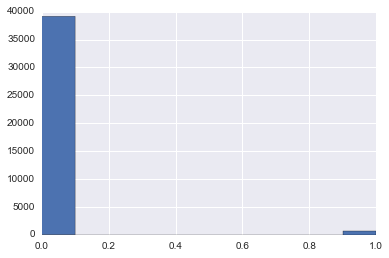

In [48]:
%matplotlib inline

import matplotlib.pyplot as plt
plt.hist(results[:,20])



In [49]:
labels[20]

u'bacon'

In [14]:
test = json_to_list(test_data, "ingredients")

In [29]:
all_ingredients_test = json_to_list(data, "ingredients") + json_to_list(test_data, "ingredients")

mapped_ing_test = get_mapper(get_uniques(all_ingredients_test))

train_features = featurize(data,"ingredients", mapped_ing_test)

test_features = featurize(test_data,"ingredients", mapped_ing_test)

train_features = np.array(train_features)
test_features = np.array(test_features)

In [35]:
from sklearn.linear_model import LogisticRegression
logit = LogisticRegression()

logit.fit(train_features, cuisines)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr',
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0)

In [37]:
prediction = logit.predict(test_features)

In [45]:
df = pd.DataFrame(prediction, index=ids)

In [46]:
df.to_csv('results.csv')

In [43]:
ids = json_to_list(test_data, "id")

In [47]:
df

,0
18009,british
28583,southern_us
41580,italian
29752,cajun_creole
35687,italian
38527,southern_us
19666,spanish
41217,chinese
28753,mexican
22659,british


In [52]:
import numpy as np
from numpy import linalg as la
m=np.matrix([[1,2,3],[3,4,5],[5,4,3],[0,2,4],[1,3,5]])
U,S,V=la.svd(m, full_matrices=False)
S[1]=0
S[2]=0
print(U)
print(S)
print(V)
print(U.shape)
print(S.shape)
print(V.shape)
print(U*np.diag(S)*V)

# mt=np.transpose(m)
# print(m*mt)
# print(mt*m)
# print(la.eig(mt*m))
# print("___________")
# print(la.eig(m*mt))
# print(la.det(mt*m))

eng1=np.power(S[0],2)+np.power(S[1],2)

eng2=np.power(S[0],2)

print(eng2,eng1)

[[-0.29769568  0.15906393 -0.02896198]
 [-0.57050856 -0.0332003   0.805891  ]
 [-0.52074297 -0.73585663 -0.41419492]
 [-0.32257847  0.5103921  -0.27782555]
 [-0.45898491  0.41425998 -0.31773642]]
[ 12.39221516   0.           0.        ]
[[-0.40928285 -0.56345932 -0.7176358 ]
 [-0.81597848 -0.12588456  0.56420935]
 [-0.40824829  0.81649658 -0.40824829]]
(5, 3)
(3,)
(3, 3)
[[ 1.509889    2.0786628   2.64743661]
 [ 2.89357443  3.98358126  5.0735881 ]
 [ 2.64116728  3.63609257  4.63101787]
 [ 1.63609257  2.25240715  2.86872172]
 [ 2.32793529  3.20486638  4.08179747]]
(153.56699645995917, 153.56699645995917)


In [51]:
eng2/eng1

0.90868045242579343